In [120]:
# !pip install spotipy 
# !pip install lyricsgenius
# !conda install -c conda-forge wordcloud --yes

## Data Collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import os 
import re
from lyricsgenius import Genius
import json
from nltk import word_tokenize
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(config.spotify['client_id'],
                                                                        config.spotify['client_secret']))

In [3]:
url = 'https://open.spotify.com/album/43otFXrY0bgaq5fB3GrZj6?si=_GGcUScGTK-P2LsvPnk2yQ&dl_branch=1'
uri = 'spotify:album:43otFXrY0bgaq5fB3GrZj6'

In [4]:
def get_album_songs(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

In [5]:
album = get_album_songs(uri)
album

,uri,track,duration_ms,explicit,track_number
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10


In [6]:
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for i in df['uri']:
        for x in sp.audio_features(tracks=[i]):
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            
    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})
    
    return df2

In [7]:
song_info = get_track_info(album)
song_info

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


In [8]:
the_getaway = album.merge(song_info, left_index=True, right_index=True)
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


chose this album because was ranked #1 in 2016 

In [9]:
def popularity(df):
    empty = []
    for i in df['uri']:
            series_track = pd.Series(sp.track(i))
            empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2

In [10]:
pop = popularity(the_getaway)
pop

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,250386,False,{'isrc': 'USWB11600617'},{'spotify': 'https://open.spotify.com/track/3b...,https://api.spotify.com/v1/tracks/3bIQIx7hveYP...,3bIQIx7hveYPQDdhjZ1kcq,False,The Getaway,60,https://p.scdn.co/mp3-preview/72fb1fa491d3aed9...,1,track,spotify:track:3bIQIx7hveYPQDdhjZ1kcq
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,302000,False,{'isrc': 'USWB11600478'},{'spotify': 'https://open.spotify.com/track/2o...,https://api.spotify.com/v1/tracks/2oaK4JLVnmRG...,2oaK4JLVnmRGIO9ytBE1bt,False,Dark Necessities,72,https://p.scdn.co/mp3-preview/603321bf69cb0fd2...,2,track,spotify:track:2oaK4JLVnmRGIO9ytBE1bt
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,200466,False,{'isrc': 'USWB11600618'},{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0cv2LgkvEoQi...,0cv2LgkvEoQiGgFWcZaAMA,False,We Turn Red,52,https://p.scdn.co/mp3-preview/7401884887b72bf4...,3,track,spotify:track:0cv2LgkvEoQiGgFWcZaAMA
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,211520,False,{'isrc': 'USWB11600619'},{'spotify': 'https://open.spotify.com/track/0p...,https://api.spotify.com/v1/tracks/0pjCkLjbgSLn...,0pjCkLjbgSLn5c0Ilwuv8z,False,The Longest Wave,60,https://p.scdn.co/mp3-preview/0800193b0d8994cf...,4,track,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268733,False,{'isrc': 'USWB11600620'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XTkpF9T2PKv...,2XTkpF9T2PKvcLgamGJGx1,False,Goodbye Angels,62,https://p.scdn.co/mp3-preview/69191d42691a7605...,5,track,spotify:track:2XTkpF9T2PKvcLgamGJGx1
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,221440,False,{'isrc': 'USWB11600621'},{'spotify': 'https://open.spotify.com/track/6G...,https://api.spotify.com/v1/tracks/6GsP3uMCd0Dn...,6GsP3uMCd0Dn5T37C93waZ,False,Sick Love,64,https://p.scdn.co/mp3-preview/cc7db96c4aef501a...,6,track,spotify:track:6GsP3uMCd0Dn5T37C93waZ
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,263800,False,{'isrc': 'USWB11600622'},{'spotify': 'https://open.spotify.com/track/5m...,https://api.spotify.com/v1/tracks/5m578MgxuEC9...,5m578MgxuEC956dulprCe8,False,Go Robot,62,https://p.scdn.co/mp3-preview/e6c44098fc6b6386...,7,track,spotify:track:5m578MgxuEC956dulprCe8
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202933,False,{'isrc': 'USWB11600623'},{'spotify': 'https://open.spotify.com/track/0S...,https://api.spotify.com/v1/tracks/0SMzXgUFqcAt...,0SMzXgUFqcAt0WNCsGm3tM,False,Feasting on the Flowers,52,https://p.scdn.co/mp3-preview/ecdacb03bb20ae47...,8,track,spotify:track:0SMzXgUFqcAt0WNCsGm3tM
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,226640,False,{'isrc': 'USWB11600624'},{'spotify': 'https://open.spotify.com/track/5y...,https://api.spotify.com/v1/tracks/5y7IfSDhBHFV...,5y7IfSDhBHFVnlGj1UrlA1,False,Detroit,56,http

In [11]:
pop['popularity']

0     60
1     72
2     52
3     60
4     62
5     64
6     62
7     52
8     56
9     48
10    53
11    49
12    48
Name: popularity, dtype: int64

In [12]:
the_getaway['popularity'] = pop['popularity']
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974,64
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010,62
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041,52
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738,56
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843,48


In [13]:
def add_popularity(df):
    pop = popularity(df)
    df['popularity'] = pop['popularity']
    return df.head()

In [14]:
uris = ['spotify:album:43otFXrY0bgaq5fB3GrZj6','spotify:album:0fLhefnjlIV3pGNF9Wo8CD',
        'spotify:album:7xl50xr9NDkd3i2kBbzsNZ',
        'spotify:album:1jWKVgnHX8nwR551hQNx5K','spotify:album:1DCI2yWmV4UI7Aga71yx9B',
        'spotify:album:5wZtSIvijWCMc1vlPFqAyB','spotify:album:74cQBDmkkzRBntR064f0SD',
        'spotify:album:1oOkcBu5bgkUzZTvKD1m8z','spotify:album:3rHJQrfEcBeSaLPuLwKR6F',
        'spotify:album:10Oqhoq2akSJnurJOPk8xT']
rhcp = pd.DataFrame(columns=the_getaway.columns)

for i in range(len(uris)):
    album = get_album_songs(uris[i])
    song = get_track_info(album)
    merged = album.merge(song, left_index=True, right_index=True)
    rhcp = rhcp.append(merged)
    
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,NaN
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,NaN
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,NaN
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,NaN
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,spotify:track:5JF24LTcYhGxynXMSFkgm1,Yertle The Turtle - Remastered,226533,False,14,0.737,0.939,5,-5.101,0.0793,0.182000,0.000596,0.0707,0.964,92.519,NaN
14,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,NaN
15,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,NaN
16,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,NaN


In [15]:
add_popularity(rhcp)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62


In [16]:
x= len(rhcp['track'])

In [17]:
new_index = list(range(0,x))
rhcp['index'] = new_index
rhcp.set_index(['index'], inplace=True)

In [18]:
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
index,,,,,,,,,,,,,,,,
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,spotify:track:5JF24LTcYhGxynXMSFkgm1,Yertle The Turtle - Remastered,226533,False,14,0.737,0.939,5,-5.101,0.0793,0.182000,0.000596,0.0707,0.964,92.519,51
162,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,48
163,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,58


In [19]:
rhcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               166 non-null    object 
 1   track             166 non-null    object 
 2   duration_ms       166 non-null    object 
 3   explicit          166 non-null    object 
 4   track_number      166 non-null    object 
 5   danceability      166 non-null    float64
 6   energy            166 non-null    float64
 7   key               166 non-null    object 
 8   loudness          166 non-null    float64
 9   speechiness       166 non-null    float64
 10  acousticness      166 non-null    float64
 11  instrumentalness  166 non-null    float64
 12  liveness          166 non-null    float64
 13  valence           166 non-null    float64
 14  tempo             166 non-null    float64
 15  popularity        166 non-null    int64  
dtypes: float64(9), int64(1), object(6)
memory us

In [5]:
album = genius.search_album("The Getaway", "Red Hot Chili Peppers")

Searching for "The Getaway" by Red Hot Chili Peppers...


In [6]:
album.save_lyrics()

Wrote Lyrics_TheGetaway.json.


In [23]:
album2 = genius.search_album("Californiacation", "Red Hot Chili Peppers")

Searching for "Californiacation" by Red Hot Chili Peppers...


In [24]:
album2.save_lyrics()

Wrote Lyrics_Californication.json.


In [22]:
with open('lyrics_data/Lyrics_TheGetaway.json') as f:
    data = json.load(f)

data['tracks'][0]['song']['lyrics']

"[Verse 1: Anthony Kiedis]\nThat's right, you're right, we will do our thing tonight alright\nTake me through the future\nIt's time, you're fine, just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go, you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it, too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel, take a spin to find out how we feel\nJust around the corner\nSlow down for sound, turn it up and no we 

In [23]:
data['tracks'][2]['song']['title']

'We Turn Red'

In [24]:
data['name']

'The Getaway'

In [25]:
# col = rhcp.get(rhcp['track'] == data['tracks'][0]['song']['title']).index
# rhcp.loc[col]['lyrics'] = data['tracks'][0]['song']['lyrics']

In [26]:
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
index,,,,,,,,,,,,,,,,
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62


In [27]:
len(data['tracks'])

13

In [28]:
lyric_df = pd.DataFrame(columns=['track','album','lyrics','cleaned_lyrics'])
lyric_df

,track,album,lyrics,cleaned_lyrics


In [29]:
def lyrics_to_df(data, df):
    for i in range(len(data['tracks'])):
        album = data['name']
        title = data['tracks'][i]['song']['title']
        lyric = data['tracks'][i]['song']['lyrics']
        df = df.append({'track': title,'album': album, 'lyrics': lyric}, ignore_index=True)
    return df

In [30]:
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,NaN
5,Sick Love,The Getaway,[Verse 1]\nSay goodbye to Oz and everything yo...,NaN
6,Go Robot,The Getaway,[Verse 1]\nI called the teacher cause I wanted...,NaN
7,Feasting on the Flowers,The Getaway,[Verse 1]\nI was walking through the streets I...,NaN
8,Detroit,The Getaway,[Verse 1]\nFind me in the suburbs and the shad...,NaN
9,This Ticonderoga,The Getaway,[Verse 1]\nI met a man in a rock 'n' roll band...,NaN


In [31]:
files = ['lyrics_data/Lyrics_Californication.json', 'lyrics_data/Lyrics_BytheWay.json',
        'lyrics_data/Lyrics_BloodSugarSexMagik.json','lyrics_data/Lyrics_FreakyStyley.json',
        'lyrics_data/Lyrics_ImwithYou.json', 'lyrics_data/Lyrics_MothersMilk.json',
        'lyrics_data/Lyrics_OneHotMinute.json','lyrics_data/Lyrics_StadiumArcadium.json',
         'lyrics_data/Lyrics_TheUpliftMofoPartyPlan.json']

for i in range(len(files)):
    with open(files[i]) as f:
        data = json.load(f)
    lyric_df = lyrics_to_df(data, lyric_df)
    
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,NaN
...,...,...,...,...
165,Party on Your Pussy (aka Special Secret Song I...,The Uplift Mofo Party Plan,"[Verse 1]\nWell, my landlady, she lives\nThree...",NaN
166,No Chump Love Sucker,The Uplift Mofo Party Plan,"[Verse 1]\nShe's a witch, a brat, a bonafide b...",NaN
167,Walkin’ On Down The Road,The Uplift Mofo Party Plan,"[Verse 1]\nWell, I'm walkin' on down the road\...",NaN
168,Love Trilogy,The Uplift Mofo Party Plan,"[Verse 1]\nMy love comes, and when it does\nIt...",NaN


In [32]:
edit = lyric_df['lyrics'][0]
edit

"[Verse 1: Anthony Kiedis]\nThat's right, you're right, we will do our thing tonight alright\nTake me through the future\nIt's time, you're fine, just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go, you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it, too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel, take a spin to find out how we feel\nJust around the corner\nSlow down for sound, turn it up and no we 

In [33]:
edit = edit.replace('URLCopyEmbedCopy', ' ').replace(',', '')
edit

"[Verse 1: Anthony Kiedis]\nThat's right you're right we will do our thing tonight alright\nTake me through the future\nIt's time you're fine just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel take a spin to find out how we feel\nJust around the corner\nSlow down for sound turn it up and no we can’t be

In [34]:
edit = re.sub(r'[\(\[].*?[\)\]]', '', edit)
edit = re.sub('\d+\S*', '', edit)
edit = os.linesep.join([s for s in edit.splitlines() if s]) 

In [35]:
edit = edit.lower().split('\n')

In [36]:
edit

["that's right you're right we will do our thing tonight alright",
 'take me through the future',
 "it's time you're fine just another color coded crime",
 'incision and a suture',
 'you told my friend we would get it on no matter when',
 'a supercavitation',
 "let's go you show me something no one will ever know",
 'a love hallucination',
 'another lonely superstar to getaway inside your car',
 'take it much too far',
 'surrender to the brave inside a lover that another tried',
 'take it too my ride',
 "you don't have to keep it if it's mine",
 'another lonely superstar to getaway inside your car',
 'another place maybe another time',
 'surrender to the brave inside a lover that another tried',
 "complete repeat sittin' in your car and on your street",
 'lost in california',
 "let's steal this wheel take a spin to find out how we feel",
 'just around the corner',
 'slow down for sound turn it up and no we can’t be found',
 'the body that we transcend',
 'asleep you weep find out that 

In [37]:
for i in range(len(lyric_df['lyrics'])):
    x = lyric_df['lyrics'][i]
    x = x.replace('URLCopyEmbedCopy', ' ').replace(',','')
    x = re.sub(r'[\(\[].*?[\)\]]', '', x)
    x = re.sub('\d+\S*', '', x)
    x = os.linesep.join([s for s in x.splitlines() if s])
    x = x.lower().split('\n')
    lyric_df['cleaned_lyrics'][i] = x

In [38]:
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo..."
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm..."
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha..."
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret..."
...,...,...,...,...
165,Party on Your Pussy (aka Special Secret Song I...,The Uplift Mofo Party Plan,"[Verse 1]\nWell, my landlady, she lives\nThree...","[well my landlady she lives, three houses away..."
166,No Chump Love Sucker,The Uplift Mofo Party Plan,"[Verse 1]\nShe's a witch, a brat, a bonafide b...","[she's a witch a brat a bonafide bore, what's ..."
167,Walkin’ On Down The Road,The Uplift Mofo Party Plan,"[Verse 1]\nWell, I'm walkin' on down the road\...","[well i'm walkin' on down the road, but it can..."
168,Love Trilogy,The Uplift Mofo Party Plan,"[Verse 1]\nMy love comes, and when it does\nIt...","[my love comes and when it does, it's a crazy ..."


In [39]:
lyric_df['lyrics'][3]

"[Verse 1]\nThrow me all around like a boomerang sky\nWhatever you do, don't tell me why\nPoppies grow tall then say bye bye\nThe wave is here\nA seamless little team and then we tanked\nI guess we're not so sacrosanct\nThe tip of my tongue but then we blanked\nThe wave is here\nWaiting on the wind to tell my side\nReady set jet but she never gets far\nListen to your skin from the seat of my car\nTwo centipedes stuck in one glass jar\nThe longest wave\nWaiting on the wind to tell my side\n\n[Pre-Chorus]\nWhatcha want?\nWhatcha need?\nDo you love?\n\n[Chorus]\nMaybe I'm the right one, maybe I'm the wrong\nJust another play, the pirate, and the Papillon\nTime to call it a day\nMaybe you're my last love, maybe you're my first\nJust another way to play inside the universe\nNow I know why we came\n[Verse 2]\nSterile as the barrel of an old 12 gauge\nUnder my skin and half my age\nHotter than the wax on a saxifrage\nThe longest wave\nWaiting on the wind to turn my page\nSteady your sails for

In [40]:
lyric_df['cleaned_lyrics'][3]

['throw me all around like a boomerang sky',
 "whatever you do don't tell me why",
 'poppies grow tall then say bye bye',
 'the wave is here',
 'a seamless little team and then we tanked',
 "i guess we're not so sacrosanct",
 'the tip of my tongue but then we blanked',
 'the wave is here',
 'waiting on the wind to tell my side',
 'ready set jet but she never gets far',
 'listen to your skin from the seat of my car',
 'two centipedes stuck in one glass jar',
 'the longest wave',
 'waiting on the wind to tell my side',
 'whatcha want?',
 'whatcha need?',
 'do you love?',
 "maybe i'm the right one maybe i'm the wrong",
 'just another play the pirate and the papillon',
 'time to call it a day',
 "maybe you're my last love maybe you're my first",
 'just another way to play inside the universe',
 'now i know why we came',
 'sterile as the barrel of an old  gauge',
 'under my skin and half my age',
 'hotter than the wax on a saxifrage',
 'the longest wave',
 'waiting on the wind to turn my pa

In [41]:
lyric_df.drop(columns=['lyrics'], inplace=True)
lyric_df.head()

,track,album,cleaned_lyrics
0,The Getaway,The Getaway,[that's right you're right we will do our thin...
1,Dark Necessities,The Getaway,"[comin' on to the light of day we got, many mo..."
2,We Turn Red,The Getaway,"[we got large and we got small, we got a swimm..."
3,The Longest Wave,The Getaway,"[throw me all around like a boomerang sky, wha..."
4,Goodbye Angels,The Getaway,"[suicide a month before i met you, deep regret..."


In [42]:
rhcp = pd.merge(rhcp, lyric_df, on=['track'])
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60,The Getaway,[that's right you're right we will do our thin...
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many mo..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52,The Getaway,"[we got large and we got small, we got a swimm..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60,The Getaway,"[throw me all around like a boomerang sky, wha..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,49,The Uplift Mofo Party Plan,"[welcome friends to my thoughts of when, the f..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,48,Freaky Styley,[you're in the middle of june in the summer of...
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,58,Freaky Styley,"[time to swing a little melody, to make you al..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,59,Freaky Styley,"[fuck 'em just to see that look on their face,..."


## Data Cleaning

In [43]:
rhcp.groupby('album').median()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
album,,,,,,,,,,
Blood Sugar Sex Magik,0.5950,0.744,-10.751,0.04840,0.002270,0.006660,0.16200,0.7100,108.2950,54.5
By the Way,0.4980,0.838,-3.988,0.03570,0.012550,0.000058,0.11000,0.3415,118.9485,52.5
Californication,0.4500,0.948,-2.086,0.08380,0.007505,0.004030,0.09295,0.4755,116.7240,54.5
Freaky Styley,0.6625,0.935,-6.493,0.09770,0.027000,0.068575,0.07310,0.6980,123.0845,56.0
I’m with You,0.5900,0.893,-2.733,0.03580,0.010800,0.000010,0.15400,0.5320,112.7350,53.0
Mother’s Milk,0.4875,0.966,-4.789,0.11550,0.001587,0.014508,0.13150,0.5095,106.1645,53.0
One Hot Minute,0.4880,0.890,-4.703,0.06370,0.006730,0.001100,0.13100,0.3220,117.0670,56.0
Stadium Arcadium,0.5400,0.875,-3.667,0.04595,0.028900,0.000026,0.12950,0.4440,111.9950,53.5
The Getaway,0.5910,0.742,-5.935,0.05970,0.104000,0.003670,0.15000,0.4950,113.9990,56.0


In [44]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
# ex = rhcp['cleaned_lyrics'][0]
# ex[0]
rhcp['tokenized_lyrics_raw'] = None 

for song in range(len(rhcp['cleaned_lyrics'])):
    lyrics = rhcp['cleaned_lyrics'][song]
    tokens = []
    for sentence in range(len(lyrics)):
        token = nltk.regexp_tokenize(lyrics[sentence], pattern)
        tokens.append(token)
    rhcp['tokenized_lyrics_raw'][song] = tokens    
rhcp    
# tokens = nltk.regexp_tokenize(ex, pattern)
# tokens

<ipython-input-44-1637bfa19bd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['tokenized_lyrics_raw'][song] = tokens


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics,tokenized_lyrics_raw
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60,The Getaway,[that's right you're right we will do our thin...,"[[that's, right, you're, right, we, will, do, ..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many mo...","[[comin, on, to, the, light, of, day, we, got]..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52,The Getaway,"[we got large and we got small, we got a swimm...","[[we, got, large, and, we, got, small], [we, g..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60,The Getaway,"[throw me all around like a boomerang sky, wha...","[[throw, me, all, around, like, a, boomerang, ..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret...","[[suicide, a, month, before, i, met, you], [de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,49,The Uplift Mofo Party Plan,"[welcome friends to my thoughts of when, the f...","[[welcome, friends, to, my, thoughts, of, when..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,48,Freaky Styley,[you're in the middle of june in the summer of...,"[[you're, in, the, middle, of, june, in, the, ..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,58,Freaky Styley,"[time to swing a little melody, to make you al...","[[time, to, swing, a, little, melody], [to, ma..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,59,Freaky Styley,"[fuck 'em just to see that look on their face,...","[[fuck, em, just, to, see, that, look, on, the..."


In [45]:
rhcp['tokenized_lyrics_raw'][0][0]

["that's",
 'right',
 "you're",
 'right',
 'we',
 'will',
 'do',
 'our',
 'thing',
 'tonight',
 'alright']

In [46]:
# corpus = []
# first = rhcp['tokenized_lyrics_raw'][0]
# for i in range(len(first)):
#     sentence = first[i]
#     for word in range(len(sentence)):
#         words = sentence[word]
#         corpus.append(words)

# corpus

In [47]:
rhcp['tokenized_lyrics'] = None 

for i in range(len(rhcp['tokenized_lyrics_raw'])):
    corpus = []
    song = rhcp['tokenized_lyrics_raw'][i]
    for x in range(len(song)):
        sentence = song[x]
        for y in range(len(sentence)):
            word = sentence[y]
            corpus.append(word)
    rhcp['tokenized_lyrics'][i] = corpus
    
rhcp

<ipython-input-47-42f3013de409>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['tokenized_lyrics'][i] = corpus


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics,tokenized_lyrics_raw,tokenized_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60,The Getaway,[that's right you're right we will do our thin...,"[[that's, right, you're, right, we, will, do, ...","[that's, right, you're, right, we, will, do, o..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many mo...","[[comin, on, to, the, light, of, day, we, got]...","[comin, on, to, the, light, of, day, we, got, ..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52,The Getaway,"[we got large and we got small, we got a swimm...","[[we, got, large, and, we, got, small], [we, g...","[we, got, large, and, we, got, small, we, got,..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60,The Getaway,"[throw me all around like a boomerang sky, wha...","[[throw, me, all, around, like, a, boomerang, ...","[throw, me, all, around, like, a, boomerang, s..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret...","[[suicide, a, month, before, i, met, you], [de...","[suicide, a, month, before, i, met, you, deep,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,49,The Uplift Mofo Party Plan,"[welcome friends to my thoughts of when, the f...","[[welcome, friends, to, my, thoughts, of, when...","[welcome, friends, to, my, thoughts, of, when,..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,48,Freaky Styley,[you're in the middle of june in the summer of...,"[[you're, in, the, middle, of, june, in, the, ...","[you're, in, the, middle, of, june, in, the, s..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,58,Freaky Styley,"[time to swing a little melody, to make you al...","[[time, to, swing, a, little, melody], [to, ma...","[time, to, swing, a, little, melody, to, make,..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,59,Freaky Styley,"[fuck 'em just to see that look on their face,...","[[fuck, em, just, to, see, that, look, on, the...","[fuck, em, just, to, see, that, look, on, thei..."


In [48]:
rhcp['tokenized_lyrics'][0]

["that's",
 'right',
 "you're",
 'right',
 'we',
 'will',
 'do',
 'our',
 'thing',
 'tonight',
 'alright',
 'take',
 'me',
 'through',
 'the',
 'future',
 "it's",
 'time',
 "you're",
 'fine',
 'just',
 'another',
 'color',
 'coded',
 'crime',
 'incision',
 'and',
 'a',
 'suture',
 'you',
 'told',
 'my',
 'friend',
 'we',
 'would',
 'get',
 'it',
 'on',
 'no',
 'matter',
 'when',
 'a',
 'supercavitation',
 "let's",
 'go',
 'you',
 'show',
 'me',
 'something',
 'no',
 'one',
 'will',
 'ever',
 'know',
 'a',
 'love',
 'hallucination',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'take',
 'it',
 'much',
 'too',
 'far',
 'surrender',
 'to',
 'the',
 'brave',
 'inside',
 'a',
 'lover',
 'that',
 'another',
 'tried',
 'take',
 'it',
 'too',
 'my',
 'ride',
 'you',
 "don't",
 'have',
 'to',
 'keep',
 'it',
 'if',
 "it's",
 'mine',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'another',
 'place',
 'maybe',
 'another

In [49]:
rhcp = rhcp.drop(columns=['tokenized_lyrics_raw'], axis=1)
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics,tokenized_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60,The Getaway,[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52,The Getaway,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60,The Getaway,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,..."


In [50]:
freq_dist = FreqDist(rhcp['tokenized_lyrics'][0])
freq_dist

FreqDist({'another': 18, 'to': 15, 'the': 13, 'inside': 13, 'a': 11, 'it': 11, 'your': 9, 'that': 9, 'take': 8, 'we': 7, ...})

## EDA - lyrics

In [70]:
#remove stop words 

stopwords_list = stopwords.words('english')
rhcp['stopped_lyrics'] = None

for i in range(len(rhcp['tokenized_lyrics'])):
    tokens = rhcp['tokenized_lyrics'][i]
    stopped = [w for w in tokens if w not in stopwords_list and w not in ['na','la', 'nah', 'ah',
                                                                          'oh', "i'm", "i've","i'll"]]
    rhcp['stopped_lyrics'][i] = stopped
    
rhcp

<ipython-input-70-6568d7e3e846>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['stopped_lyrics'][i] = stopped


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics,tokenized_lyrics,stopped_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60,The Getaway,[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o...","[that's, right, right, thing, tonight, alright..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ...","[comin, light, day, got, many, moons, deep, pl..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52,The Getaway,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,...","[got, large, got, small, got, swimming, pool, ..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60,The Getaway,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s...","[throw, around, like, boomerang, sky, whatever..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,...","[suicide, month, met, deep, regrets, never, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,49,The Uplift Mofo Party Plan,"[welcome friends to my thoughts of when, the f...","[welcome, friends, to, my, thoughts, of, when,...","[welcome, friends, thoughts, fax, city, four, ..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,48,Freaky Styley,[you're in the middle of june in the summer of...,"[you're, in, the, middle, of, june, in, the, s...","[middle, june, summer, young, cool, shot, bad,..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,58,Freaky Styley,"[time to swing a little melody, to make you al...","[time, to, swing, a, little, melody, to, make,...","[time, swing, little, melody, make, feel, some..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,59,Freaky Styley,"[fuck 'em just to see that look on their face,...","[fuck, em, just, to, see, that, look, on, thei...","[fuck, em, see, look, face, fuck, em, see, loo..."


In [71]:
freq_dist = FreqDist(rhcp['stopped_lyrics'][0])
freq_dist

FreqDist({'another': 18, 'inside': 13, 'take': 8, 'car': 7, 'lonely': 6, 'superstar': 6, 'getaway': 6, 'surrender': 6, 'brave': 6, 'lover': 6, ...})

In [72]:
rhcp_lyrics_stopped = []
for i in range(len(rhcp['stopped_lyrics'])):
    song = rhcp['stopped_lyrics'][i]
    for x in range(len(song)):
        word = song[x]
        rhcp_lyrics_stopped.append(word)
        
rhcp_lyrics_stopped

["that's",
 'right',
 'right',
 'thing',
 'tonight',
 'alright',
 'take',
 'future',
 'time',
 'fine',
 'another',
 'color',
 'coded',
 'crime',
 'incision',
 'suture',
 'told',
 'friend',
 'would',
 'get',
 'matter',
 'supercavitation',
 "let's",
 'go',
 'show',
 'something',
 'one',
 'ever',
 'know',
 'love',
 'hallucination',
 'another',
 'lonely',
 'superstar',
 'getaway',
 'inside',
 'car',
 'take',
 'much',
 'far',
 'surrender',
 'brave',
 'inside',
 'lover',
 'another',
 'tried',
 'take',
 'ride',
 'keep',
 'mine',
 'another',
 'lonely',
 'superstar',
 'getaway',
 'inside',
 'car',
 'another',
 'place',
 'maybe',
 'another',
 'time',
 'surrender',
 'brave',
 'inside',
 'lover',
 'another',
 'tried',
 'complete',
 'repeat',
 'sittin',
 'car',
 'street',
 'lost',
 'california',
 "let's",
 'steal',
 'wheel',
 'take',
 'spin',
 'find',
 'feel',
 'around',
 'corner',
 'slow',
 'sound',
 'turn',
 'found',
 'body',
 'transcend',
 'asleep',
 'weep',
 'find',
 'trick',
 'never',
 'cheap'

In [73]:
freq_dist = FreqDist(rhcp_lyrics_stopped)
freq_dist.most_common(50)

[('love', 209),
 ('got', 207),
 ('know', 188),
 ('like', 183),
 ('get', 175),
 ('yeah', 161),
 ('away', 143),
 ('take', 142),
 ('come', 136),
 ('see', 129),
 ('give', 125),
 ('go', 118),
 ('never', 118),
 ('make', 115),
 ('time', 110),
 ('one', 110),
 ('around', 102),
 ('want', 102),
 ('little', 99),
 ('say', 97),
 ('could', 94),
 ('look', 88),
 ('girl', 85),
 ('hey', 83),
 ('tell', 75),
 ('cause', 73),
 ('way', 72),
 ('good', 71),
 ('another', 70),
 ('well', 70),
 ('right', 67),
 ('man', 63),
 ('long', 62),
 ('said', 61),
 ('baby', 59),
 ('find', 58),
 ('something', 57),
 ('face', 57),
 ('wanna', 55),
 ('better', 55),
 ('turn', 54),
 ('day', 54),
 ('life', 54),
 ('dance', 53),
 ('feel', 52),
 ('ever', 49),
 ('everything', 48),
 ('please', 48),
 ("can't", 45),
 ('magik', 44)]

In [74]:
# plt.figure(figsize=(18,8))
# freq_dist.plot(50, title='Freq Distribution for top 50 words')

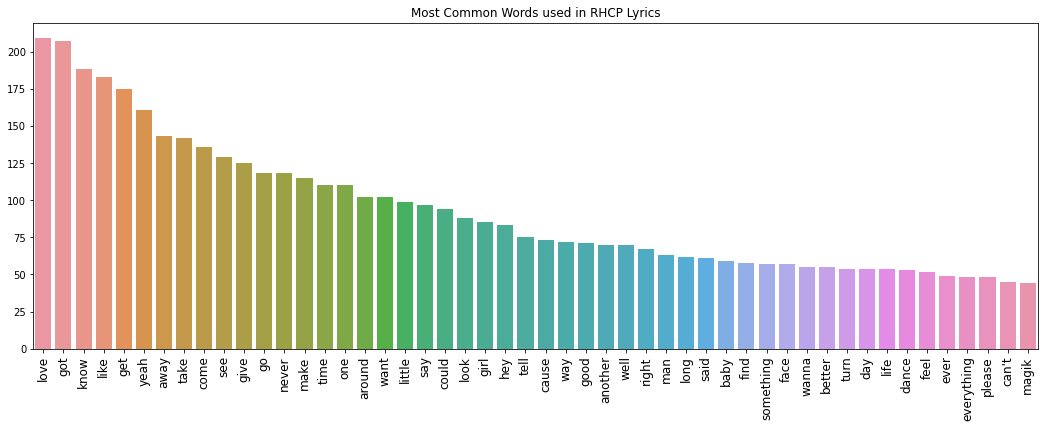

In [75]:
word_counts = Counter(rhcp_lyrics_stopped)
common_words = [word[0] for word in word_counts.most_common(50)]
common_counts = [word[1] for word in word_counts.most_common(50)]

plt.figure(figsize=(18, 6))
sns.barplot(x=common_words, y=common_counts)
plt.title("Most Common Words used in RHCP Lyrics")
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [113]:
from wordcloud import WordCloud

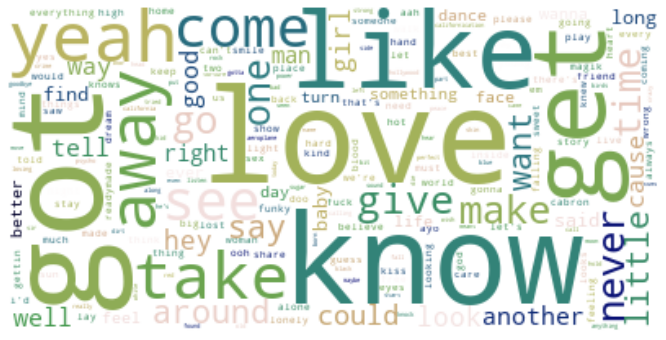

In [132]:
word_counts = Counter(rhcp_lyrics_stopped)
cloud = WordCloud(max_font_size=80,colormap="gist_earth", background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(16,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
total_word_count = len(freq_dist)
top_50 = freq_dist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in top_50:
    normalized_frequency = word[1]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
love 			 0.05796
got 			 0.0574
know 			 0.05214
like 			 0.05075
get 			 0.04853
yeah 			 0.04465
away 			 0.03966
take 			 0.03938
come 			 0.03771
see 			 0.03577
give 			 0.03466
go 			 0.03272
never 			 0.03272
make 			 0.03189
time 			 0.0305
one 			 0.0305
around 			 0.02829
want 			 0.02829
little 			 0.02745
say 			 0.0269
could 			 0.02607
look 			 0.0244
girl 			 0.02357
hey 			 0.02302
tell 			 0.0208
cause 			 0.02024
way 			 0.01997
good 			 0.01969
another 			 0.01941
well 			 0.01941
right 			 0.01858
man 			 0.01747
long 			 0.01719
said 			 0.01692
baby 			 0.01636
find 			 0.01608
something 			 0.01581
face 			 0.01581
wanna 			 0.01525
better 			 0.01525
turn 			 0.01498
day 			 0.01498
life 			 0.01498
dance 			 0.0147
feel 			 0.01442
ever 			 0.01359
everything 			 0.01331
please 			 0.01331
can't 			 0.01248
magik 			 0.0122


In [116]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
rhcp_finder = BigramCollocationFinder.from_words(rhcp_lyrics_stopped)
rhcp_scored = rhcp_finder.score_ngrams(bigram_measures.raw_freq)
rhcp_scored[:50]

[(('give', 'away'), 0.004075216859754323),
 (('away', 'give'), 0.0036676951737788905),
 (('yeah', 'yeah'), 0.0023286953484310414),
 (('sex', 'magik'), 0.0018629562787448332),
 (('dance', 'dance'), 0.001746521511323281),
 (('ayo', 'ayo'), 0.001630086743901729),
 (('magik', 'sex'), 0.001630086743901729),
 (('em', 'see'), 0.0012807824416370729),
 (('fuck', 'em'), 0.0012807824416370729),
 (('got', 'got'), 0.0012807824416370729),
 (('look', 'face'), 0.0012807824416370729),
 (('see', 'look'), 0.0012807824416370729),
 (('good', 'god'), 0.001222565057926297),
 (('lay', 'lay'), 0.001222565057926297),
 (('see', 'around'), 0.001222565057926297),
 (('aah', 'aah'), 0.0011643476742155207),
 (('cabron', 'cabron'), 0.0011643476742155207),
 (('face', 'fuck'), 0.0011643476742155207),
 (('see', 'gettin'), 0.0011643476742155207),
 (('come', 'get'), 0.0011061302905047447),
 (('like', 'dirt'), 0.0011061302905047447),
 (('look', 'around'), 0.0011061302905047447),
 (('one', 'big'), 0.0010479129067939687),
 ((

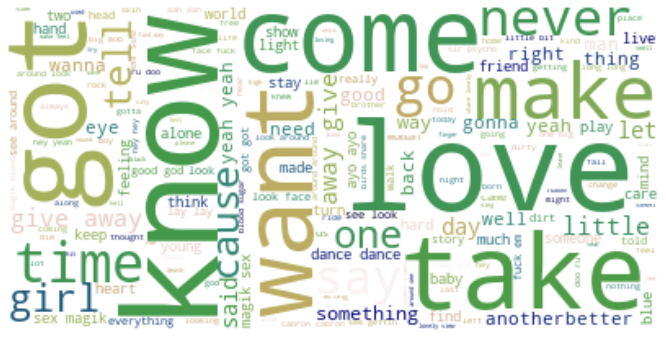

In [151]:
rhcp_lyr_str = ' '.join(rhcp_lyrics_stopped)
cloud = WordCloud(max_font_size=80,colormap="gist_earth", 
                  collocations=2, background_color='white').generate(rhcp_lyr_str)
plt.figure(figsize=(16,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [146]:
#groupby album and see how/if freq dist. is different/same - def function for this 

def album_word_freq(df, album_name, n):
    album = df.get(df['album'] == album_name)
    stopped_lyrics = []
    for i in range(len(album['stopped_lyrics'])):
        song = album['stopped_lyrics'][i]
        for x in range(len(song)):
            word = song[x]
            stopped_lyrics.append(word)
    
    word_counts = Counter(stopped_lyrics)
    cloud = WordCloud(max_font_size=80,colormap="gist_earth", 
                      background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(16,6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

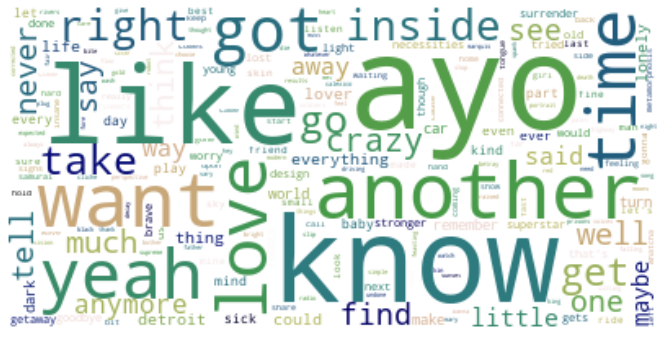

In [147]:
album_word_freq(rhcp, 'The Getaway', 50)

In [104]:
rhcp['album'].value_counts()
# album_word_freq(rhcp, 'Californiacation', 50)

Stadium Arcadium              24
Blood Sugar Sex Magik         16
By the Way                    14
Californication               14
One Hot Minute                13
The Getaway                   13
I’m with You                  11
The Uplift Mofo Party Plan     7
Freaky Styley                  4
Mother’s Milk                  2
Name: album, dtype: int64

In [152]:
# album_names = list(rhcp.album.unique())
# album_names

# for albums in range(len(album_names)):
#     album_word_freq(rhcp, album_names[albums], 20)

## EDA - other song info

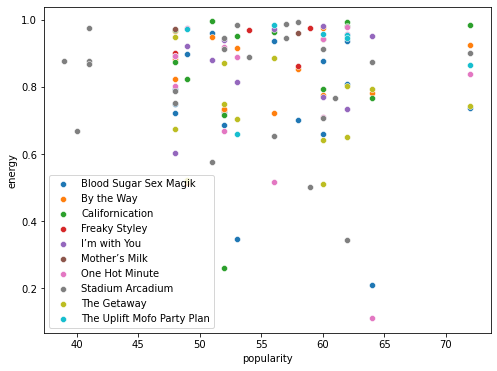

In [160]:
grouped = rhcp.groupby('album')
# grouped.plot(grouped['danceability'], kind='bar')
fix, ax = plt.subplots(figsize=(8,6))
for name, group in grouped:
    sns.scatterplot(x=group['popularity'], y=group['energy'], label=name)
#     plt.plot(group["popularity"], group["energy"], marker="o", linestyle="", label=name)
    plt.legend()

In [162]:
rhcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               118 non-null    object 
 1   track             118 non-null    object 
 2   duration_ms       118 non-null    object 
 3   explicit          118 non-null    object 
 4   track_number      118 non-null    object 
 5   danceability      118 non-null    float64
 6   energy            118 non-null    float64
 7   key               118 non-null    object 
 8   loudness          118 non-null    float64
 9   speechiness       118 non-null    float64
 10  acousticness      118 non-null    float64
 11  instrumentalness  118 non-null    float64
 12  liveness          118 non-null    float64
 13  valence           118 non-null    float64
 14  tempo             118 non-null    float64
 15  popularity        118 non-null    int64  
 16  album             118 non-null    object 
 1

In [ ]:
cont_var = 

## Linear Regression - Song Info to predict popularity

In [111]:
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,tokenized_lyrics,stopped_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60,The Getaway,"[that's, right, you're, right, we, will, do, o...","[that's, right, right, thing, tonight, alright..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway,"[comin, on, to, the, light, of, day, we, got, ...","[comin, light, day, got, many, moons, deep, pl..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52,The Getaway,"[we, got, large, and, we, got, small, we, got,...","[got, large, got, small, got, swimming, pool, ..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60,The Getaway,"[throw, me, all, around, like, a, boomerang, s...","[throw, around, like, boomerang, sky, whatever..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62,The Getaway,"[suicide, a, month, before, i, met, you, deep,...","[suicide, month, met, deep, regrets, never, co..."


In [56]:
explicit_dummies = pd.get_dummies(rhcp['explicit'], drop_first=True)
album_dum = pd.get_dummies(rhcp['album'], drop_first=True)
rhcp_reg = rhcp.drop(columns=['explicit', 'album', 'track', 'uri', 'tokenized_lyrics'], axis=1)
rhcp_reg = pd.concat([rhcp_reg, explicit_dummies, album_dum], axis=1)
rhcp_reg

,duration_ms,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,True,By the Way,Californication,Freaky Styley,I’m with You,Mother’s Milk,One Hot Minute,Stadium Arcadium,The Getaway,The Uplift Mofo Party Plan
0,250386,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,...,0,0,0,0,0,0,0,0,1,0
1,302000,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,...,0,0,0,0,0,0,0,0,1,0
2,200466,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,...,0,0,0,0,0,0,0,0,1,0
3,211520,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,...,0,0,0,0,0,0,0,0,1,0
4,268733,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,250733,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,...,1,0,0,0,0,0,0,0,0,1
114,137040,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,...,1,0,0,1,0,0,0,0,0,0
115,97226,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,...,1,0,0,1,0,0,0,0,0,0
116,529373,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,...,1,0,0,1,0,0,0,0,0,0


In [112]:
#create graphs to show relationship btw dependent variables and popularity 
#train test split 
#use tfidf on lyrics
#standardize other columns 
#run initial regression model
#gridsearch

In [ ]:
#make neural network for lyric predition using seed starter words - lstm